In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score

In [ ]:
dt = pd.read_csv("Diabetes.csv")

In [ ]:
dt['Pregnancies'] = (dt['Pregnancies']-dt['Pregnancies'].mean())/(dt['Pregnancies'].std())
dt['Glucose'] = (dt['Glucose']-dt['Glucose'].mean())/(dt['Glucose'].std())
dt['BloodPressure'] = (dt['BloodPressure']-dt['BloodPressure'].mean())/(dt['BloodPressure'].std())
dt['SkinThickness'] = (dt['SkinThickness']-dt['SkinThickness'].mean())/(dt['SkinThickness'].std())
dt['Insulin'] = (dt['Insulin']-dt['Insulin'].mean())/(dt['Insulin'].std())
dt['BMI'] = (dt['BMI']-dt['BMI'].mean())/(dt['BMI'].std())
dt['DiabetesPedigreeFunction'] = (dt['DiabetesPedigreeFunction']-dt['DiabetesPedigreeFunction'].mean())/(dt['DiabetesPedigreeFunction'].std())
dt['Age'] = (dt['Age']-dt['Age'].mean())/(dt['Age'].std())
dt


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


In [ ]:
def dataset_himpunan1(dt,train1,test1):
    for i in range(len(dt)):
        if(i in range(0,614)):
            train1.append(dt.loc[i])
        else:
            test1.append(dt.loc[i])

def dataset_himpunan2(dt,train2,test2):
    for i in range(len(dt)):
        if(i in range(0,461) or i in range(615,768)):
            train2.append(dt.loc[i])
        else:
            test2.append(dt.loc[i])

def dataset_himpunan3(dt,train3,test3):
    for i in range(len(dt)):
        if(i in range(0,307) or i in range(462,768)):
            train3.append(dt.loc[i])
        else:
            test3.append(dt.loc[i])

def dataset_himpunan4(dt,train4,test4):
    for i in range(len(dt)):
        if(i in range(0,154) or i in range(308,768)):
            train4.append(dt.loc[i])
        else:
            test4.append(dt.loc[i])

def dataset_himpunan5(dt,train5,test5):
    for i in range(len(dt)):
        if(i in range(155,768)):
            train5.append(dt.loc[i])
        else:
            test5.append(dt.loc[i])




In [ ]:
test1, test2, test3, test4, test5 = [], [], [], [], []
train1, train2, train3, train4, train5 = [], [], [], [], [] 

In [ ]:
#Distance Count With Manhattan Distance
def manhattan_distance(train_set,test_set):
  train_set = np.asarray(train_set)
  test_set = np.asarray(test_set)
  sum = np.sum(abs(train_set - test_set))#numpy
  return sum

In [ ]:
def knn(train_set,test_set,k):
  actual = []
  hasil = []
  #klasifikasi
  for i in range(len(test_set)):
    all_range = []
    labels = []
    for j in range(len(train_set)):
      total = manhattan_distance(train_set[j][:'Age'],test_set[i][:'Age'])
      all_range.append(total)

    actual.append(test_set[i]['Outcome'])
    closest = np.argsort(all_range)[:k]
 #data sudah dipih yang paling terkecil
 #data juga sudah disort
    for l in closest :
      labels.append(train_set[l]['Outcome'])
      
    vote = Counter(labels).most_common(1)
    hasil.append(vote[0][0])
  akurasi = accuracy_score(actual,hasil) 
  return akurasi
  #data dicek apakah mirip dgn akurasi yg sebenarnya


In [ ]:
dataset_himpunan1(dt,train1,test1)
dataset_himpunan2(dt,train2,test2)
dataset_himpunan3(dt,train3,test3)
dataset_himpunan4(dt,train4,test4)
dataset_himpunan5(dt,train5,test5)

In [ ]:
#mainProgram
act_1 = []
act_2 = []
act_3 = []
act_4 = []
act_5 = []

for i in range(len(train1)):
  act_1.append(train1[i]['Outcome'])
for j in range(len(train2)):
  act_2.append(train2[j]['Outcome'])
for k in range(len(train3)):
  act_3.append(train3[k]['Outcome'])
for l in range(len(train4)):
  act_4.append(train4[l]['Outcome'])
for m in range(len(train5)):
  act_5.append(train5[m]['Outcome'])

k = 1
k_array = []
nilaiakurasi = []
for i in range(0,20):
  knn1 = knn(train1,test1,k)
  knn2 = knn(train2,test2,k)
  knn3 = knn(train3,test3,k)
  knn4 = knn(train4,test4,k)
  knn5 = knn(train5,test5,k)
  total =((knn1 + knn2 + knn3 + knn4 + knn5)/5)*100
  print("Nilai K : ",k)
  print("Akurasi : ",total)
  nilaiakurasi.append(total)
  k_array.append(k)
  k+=2
for i in range(0,len(nilaiakurasi)):
  if (nilaiakurasi[i] == max(nilaiakurasi)):
    print("Nilai k Terbaik :",(k_array[i]))
print("Akurasi Tertinggi :",max(nilaiakurasi))

Nilai K :  1
Akurasi :  70.33263510682866
Nilai K :  3
Akurasi :  71.8843736908253
Nilai K :  5
Akurasi :  72.40720569752827
Nilai K :  7
Akurasi :  74.7373271889401
Nilai K :  9
Akurasi :  75.64306661080855
Nilai K :  11
Akurasi :  74.99204021784666
Nilai K :  13
Akurasi :  74.47423544197737
Nilai K :  15
Akurasi :  75.38416422287389
Nilai K :  17
Akurasi :  75.1277754503561
Nilai K :  19
Akurasi :  76.42563887725177
Nilai K :  21
Akurasi :  76.55550900712191
Nilai K :  23
Akurasi :  76.55215751989945
Nilai K :  25
Akurasi :  75.90364474235443
Nilai K :  27
Akurasi :  75.90532048596565
Nilai K :  29
Akurasi :  76.03519061583577
Nilai K :  31
Akurasi :  75.90364474235443
Nilai K :  33
Akurasi :  76.42228739002933
Nilai K :  35
Akurasi :  76.42228739002933
Nilai K :  37
Akurasi :  76.81022203602849
Nilai K :  39
Akurasi :  76.16254713028907
Nilai k Terbaik : 37
Akurasi Tertinggi : 76.81022203602849


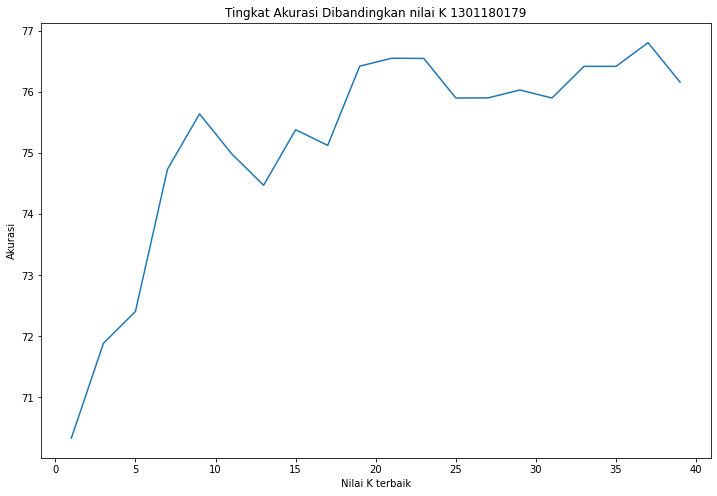

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(k_array, nilaiakurasi)
plt.title('Grafik tingkat Akurasi 1301180179')
plt.xlabel('Nilai K terbaik')
plt.ylabel('Akurasi')
plt.show()